<a href="https://colab.research.google.com/github/rafaeldjsm/Data_Science/blob/master/metricas_corrida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Estimando a média dos expoentes

Através das minhas melhores performances em cada distância, determinarei as previsões de melhores performances usando a equação de Pete Riegel.

$$T_2 = T_1 \left( \frac{D_2}{D_1} \right)^{1.06}$$

Onde:

* $T_2$ = tempo previsto (min)
* $T_1$ = tempo base (min)
* $D_2$ = distância prevista (km)
* $D_1$ = distância base (km)

Porém, no lugar de considerar o expoente de 1.06, tentarei extimar os expoente mais adequado as minhas marcas.

,Distance,Time
0,"0,4",00:01:33
1,"0,804672",00:03:28.54
2,1,00:04:24.4
3,"1,609344",00:07:25.6
4,"3,218688",00:16:04
5,5,00:25:34
6,10,00:55:20
7,"21,0975",02:06:34
8,"42,195",04:47:29


A média dos expoentes encontrados é de  1.1112394510001389


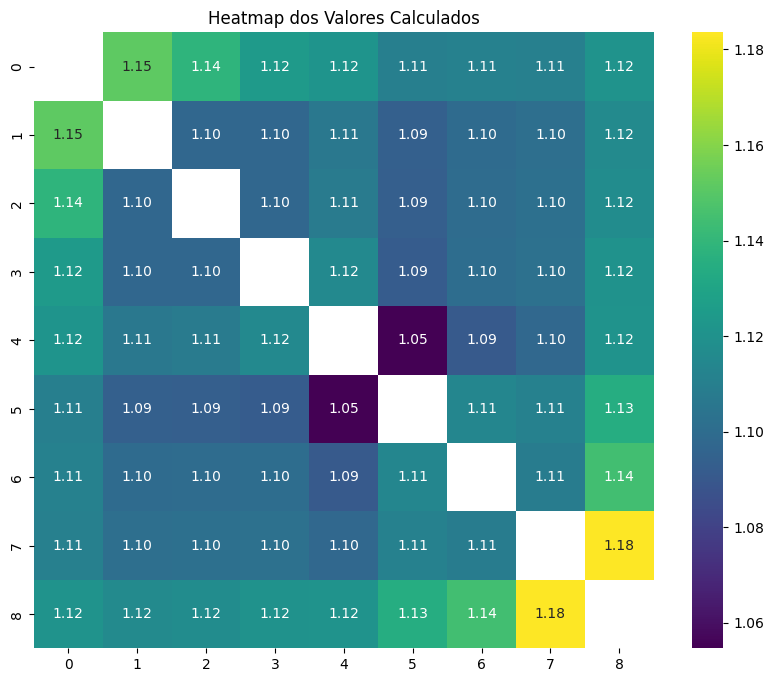

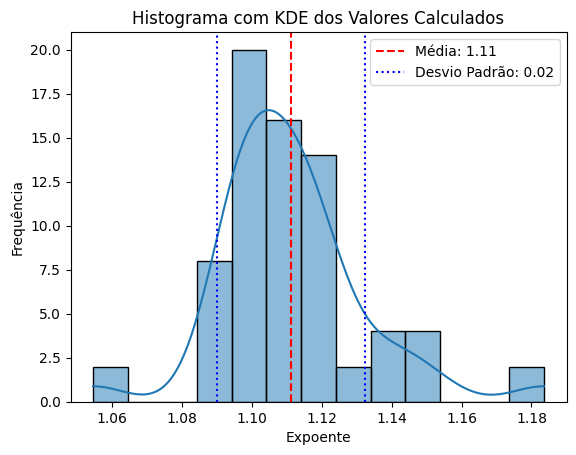

In [2]:
# @title
import io
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar, curve_fit, newton
from datetime import timedelta


df_pace =  pd.read_csv(io.StringIO('''
"0,4",00:01:33
"0,804672",00:03:28.54
1,00:04:24.4
"1,609344",00:07:25.6
"3,218688",00:16:04
5,00:25:34
10,00:55:20
"21,0975",02:06:34
"42,195",04:47:29
'''), header= None, names=['Distance', 'Time'])


# df_pace.drop(range(10,16), inplace=True)
# df_pace.drop([3,5,7], inplace=True)

display(df_pace)

# Converter a primeira coluna para numérico
df_pace['Distance'] = pd.to_numeric(df_pace['Distance'].str.replace(",","."), errors='coerce')

# Converter a segunda coluna para o formato de hora
df_pace['Time'] = pd.to_timedelta(df_pace['Time']).dt.seconds/60

def create_pivot_table(df):
    """
    Função para criar uma tabela dinâmica a partir de um DataFrame com a estimativa do expoente de cada relação Distancia x Tempo

    Args:
      df: Dataframe com as colunas 'Distance' e 'Time'

    Returns: Dataframe com a tabela dinâmica

    """
    # Criar arrays de log das distâncias e tempos
    log_distances = np.log(df['Distance'].to_numpy())
    log_times = np.log(df['Time'].to_numpy())

    # Usar broadcasting para criar as matrizes de diferenças
    log_distance_diff = log_distances[:, np.newaxis] - log_distances[np.newaxis, :]
    log_time_diff = log_times[:, np.newaxis] - log_times[np.newaxis, :]

    np.fill_diagonal(log_distance_diff, np.nan)

    # Calcular a matriz resultante
    result = log_time_diff / log_distance_diff

    # Converter a matriz resultante em um DataFrame para melhor visualização
    return pd.DataFrame(result, index=df.index, columns=df.index)


pivot_df = create_pivot_table(df_pace)

print("A média dos expoentes encontrados é de ",pivot_df.mean(axis=None)) # 1.0925443118856697

# Criar o heatmap
plt.figure(figsize=(10, 8))  # Ajustar o tamanho da figura, se necessário
sns.heatmap(pivot_df, annot=True, cmap='viridis', fmt=".2f")
plt.title('Heatmap dos Valores Calculados')
plt.show()

# Calcular a média e desvio padrão
serie_exp = pivot_df.stack()


mean_value = serie_exp.mean()
std_value = serie_exp.std()

sns.histplot(serie_exp, kde=True)
plt.title('Histograma com KDE dos Valores Calculados')
plt.xlabel('Expoente')
plt.ylabel('Frequência')

# Adicionar linhas verticais para a média, moda e desvio padrão
plt.axvline(mean_value, color='r', linestyle='--', label=f'Média: {mean_value:.2f}')
plt.axvline(mean_value + std_value, color='b', linestyle=':', label=f'Desvio Padrão: {std_value:.2f}')
plt.axvline(mean_value - std_value, color='b', linestyle=':')

plt.legend()
plt.show()

# 2. Estimativas de antes de 2017



A média dos expoentes encontrados é de  1.0796841953962515


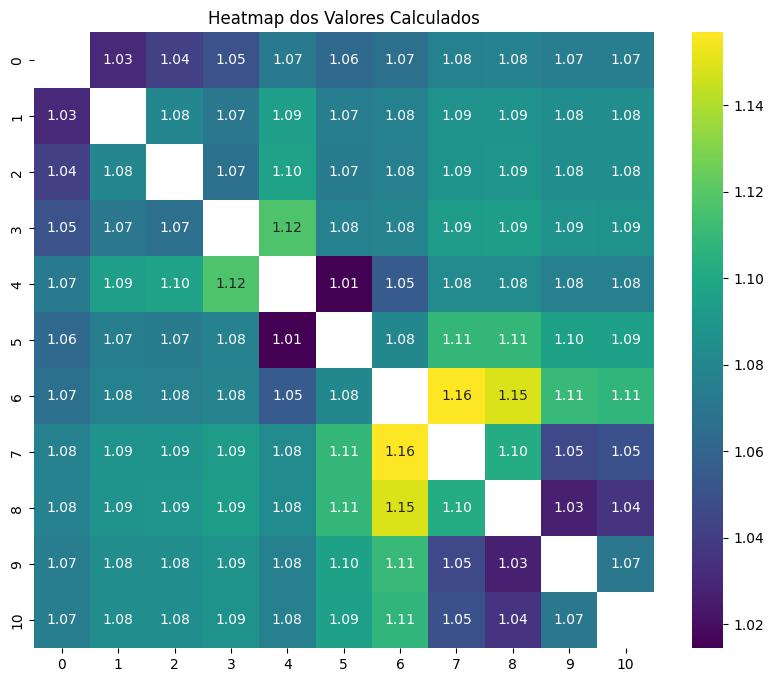

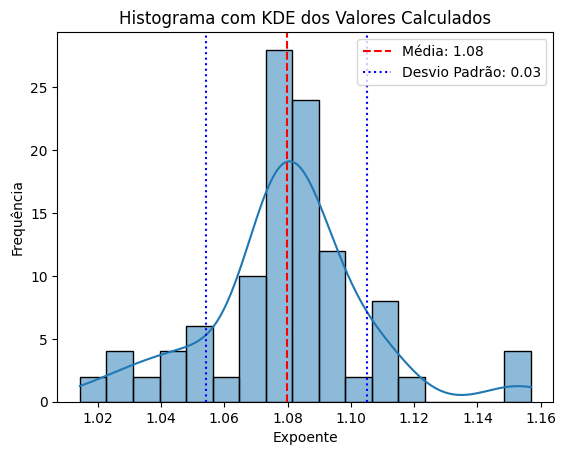

In [3]:
# @title
df_pace2 = pd.read_csv(io.StringIO('''
"0,4",00:01:32
"0,804672",00:03:09
1,00:03:59
"1,609344",00:06:37
"3,218688",00:14:21
5,00:22:26
10,00:47:27
15,01:15:51
"16,09344",01:21:58
20,01:42:28
"21,0975",01:48:30
'''), header= None, names=['Distance', 'Time']).dropna()


# Converter a primeira coluna para numérico
df_pace2['Distance'] = pd.to_numeric(df_pace2['Distance'].str.replace(",","."), errors='coerce')

# Converter a segunda coluna para o formato de hora
df_pace2['Time'] = pd.to_timedelta(df_pace2['Time']).dt.seconds/60

# Criar a tabela dinâmica
pivot_df2 = create_pivot_table(df_pace2)

print("A média dos expoentes encontrados é de ",pivot_df2.mean(axis=None)) # 1.0933693199876688

# Criar o heatmap
plt.figure(figsize=(10, 8))  # Ajustar o tamanho da figura, se necessário
sns.heatmap(pivot_df2, annot=True, cmap='viridis', fmt=".2f")
plt.title('Heatmap dos Valores Calculados')
plt.show()

# Calcular a média e desvio padrão
serie_exp2 = pivot_df2.stack()

mean_value2 = serie_exp2.mean()
std_value2 = serie_exp2.std()

sns.histplot(serie_exp2, kde=True)
plt.title('Histograma com KDE dos Valores Calculados')
plt.xlabel('Expoente')
plt.ylabel('Frequência')

# Adicionar linhas verticais para a média, moda e desvio padrão
plt.axvline(mean_value2, color='r', linestyle='--', label=f'Média: {mean_value2:.2f}')
plt.axvline(mean_value2 + std_value2, color='b', linestyle=':', label=f'Desvio Padrão: {std_value2:.2f}')
plt.axvline(mean_value2 - std_value2, color='b', linestyle=':')

plt.legend()
plt.show()

# 3. Estimando o expoente que gere menor erro quadrático

In [4]:
# @title
# Usar broadcasting para criar as matrizes da razoes
distance_frac = df_pace['Distance'].to_numpy()[np.newaxis, :] / (df_pace['Distance']).to_numpy()[:, np.newaxis]

time = df_pace['Time'].to_numpy()

coef = 1.1135696382711653

np.sum((((distance_frac**coef)*(time[:, np.newaxis]) - time)*60)**2, axis = None)

2958923.918858527

Segundo as recomendações mais recentes e padrões de eficiência, é melhor usar df.to_numpy() para gerar um array a partir de um DataFrame df no Pandas. O método df.to_numpy() é o método moderno recomendado pelos desenvolvedores do Pandas, enquanto df.values ainda funciona, mas é considerado mais antigo.




**Resumo das Diferenças:** <br>
Dimensionalidade:<br>

minimize_scalar: Minimiza funções de uma única variável.<br>
minimize: Minimiza funções de múltiplas variáveis.

In [5]:
# @title
def find_optimal_coef(df):
  """

  Args:
    df: Dataframe com as colunas 'Distance' e 'Time'

  Returns: O valor de "coef" que minimiza o erro quadrático das estimativa de Riegel.

  """
  # Usar broadcasting para criar as matrizes da razoes
  distance_frac = df['Distance'].to_numpy()[np.newaxis, :] / (df['Distance']).to_numpy()[:, np.newaxis]
  time = df['Time'].to_numpy()

  def objective_function(coef):
    return np.sum((((distance_frac**coef)*(time[:, np.newaxis] ) - time)*60)**2, axis = None)

  result = minimize_scalar(objective_function, bounds=(1.0, 1.2), method='bounded')

  return result.x

optimal_coef = find_optimal_coef(df_pace)
print(optimal_coef)  # Output: 1.1135696382711653

1.1187093711328064


## Estimando os valores esperados através do coeficiente otimizado

In [6]:
# @title
dist_prev = pd.read_csv(io.StringIO('''
"0,4"
"0,804672"
1
"1,5"
"1,609344"
3
"3,218688"
"4,828032"
5
10
15
"16,09344"
20
"21,0975"
30
"42,195"
'''),names=['Distance'], header=None )

dist_prev['Distance'] = dist_prev['Distance'].str.replace(',', '.').astype(float)

dist_frac = (dist_prev['Distance']).to_numpy()[:, np.newaxis] / df_pace['Distance'].to_numpy()[np.newaxis, :]

df_times_predct = pd.DataFrame((dist_frac ** optimal_coef)*time,
                               index = dist_prev['Distance'],
                               columns = df_pace['Distance'])

display(df_times_predct)


# Função para converter minutos decimais para timedelta e formatar em hh:mm:ss
def convert_to_hhmmss(minutes):
    timedelta = pd.to_timedelta(minutes, unit='m')
    return timedelta

# Aplicar a função a todas as colunas
for col in df_times_predct.columns:
    df_times_predct[col] = df_times_predct[col].apply(convert_to_hhmmss)

# Função para converter timedelta para o formato hh:mm:ss
def format_timedelta(td):
    total_seconds = int(td.total_seconds())
    hours, remainder = divmod(total_seconds, 3600)
    minutes, seconds = divmod(remainder, 60)
    return f"{hours:02d}:{minutes:02d}:{seconds:02d}"


df_times_predct2 = df_times_predct.copy(deep = True)

# Aplicar a função a todas as colunas com timedelta
for col in df_times_predct2.columns:
    df_times_predct2[col] = df_times_predct2[col].apply(format_timedelta)

display(df_times_predct2)

Distance,0.400000,0.804672,1.000000,1.609344,3.218688,5.000000,10.000000,21.097500,42.195000
Distance,,,,,,,,,
0.400000,1.550000,1.586054,1.578605,1.562606,1.558840,1.515481,1.510422,1.498685,1.567613
0.804672,3.387863,3.466667,3.450386,3.415417,3.407184,3.312415,3.301357,3.275704,3.426360
1.000000,4.320270,4.420762,4.400000,4.355407,4.344909,4.224057,4.209955,4.177243,4.369361
1.500000,6.799952,6.958122,6.925444,6.855256,6.838732,6.648517,6.626320,6.574832,6.877220
1.609344,7.356834,7.527958,7.492603,7.416667,7.398790,7.192997,7.168982,7.113278,7.440430
3.000000,14.766274,15.109745,15.038783,14.886367,14.850486,14.437428,14.389228,14.277420,14.934063
3.218688,15.975558,16.347157,16.270384,16.105486,16.066667,15.619781,15.567633,15.446669,16.157088
4.828032,25.144962,25.729846,25.609007,25.349464,25.288363,24.584981,24.502902,24.312509,25.430684
5.000000,26.149007,26.757246,26.631582,26.361676,26.298135,25.566667,25.481310,25.283315,26.446138


Distance,0.400000,0.804672,1.000000,1.609344,3.218688,5.000000,10.000000,21.097500,42.195000
Distance,,,,,,,,,
0.400000,00:01:33,00:01:35,00:01:34,00:01:33,00:01:33,00:01:30,00:01:30,00:01:29,00:01:34
0.804672,00:03:23,00:03:28,00:03:27,00:03:24,00:03:24,00:03:18,00:03:18,00:03:16,00:03:25
1.000000,00:04:19,00:04:25,00:04:24,00:04:21,00:04:20,00:04:13,00:04:12,00:04:10,00:04:22
1.500000,00:06:47,00:06:57,00:06:55,00:06:51,00:06:50,00:06:38,00:06:37,00:06:34,00:06:52
1.609344,00:07:21,00:07:31,00:07:29,00:07:25,00:07:23,00:07:11,00:07:10,00:07:06,00:07:26
3.000000,00:14:45,00:15:06,00:15:02,00:14:53,00:14:51,00:14:26,00:14:23,00:14:16,00:14:56
3.218688,00:15:58,00:16:20,00:16:16,00:16:06,00:16:04,00:15:37,00:15:34,00:15:26,00:16:09
4.828032,00:25:08,00:25:43,00:25:36,00:25:20,00:25:17,00:24:35,00:24:30,00:24:18,00:25:25
5.000000,00:26:08,00:26:45,00:26:37,00:26:21,00:26:17,00:25:34,00:25:28,00:25:16,00:26:26


## Resumos das estimativas

In [7]:
# @title
df_times_predct3 = df_times_predct.T.describe().T.copy(deep=True)


# Aplicar a função a todas as colunas com timedelta
for col in df_times_predct3.columns[1:]:
    df_times_predct3[col] = df_times_predct3[col].apply(format_timedelta)

display(df_times_predct3)

,count,mean,std,min,25%,50%,75%,max
Distance,,,,,,,,
0.400000,9,00:01:32,00:00:01,00:01:29,00:01:30,00:01:33,00:01:34,00:01:35
0.804672,9,00:03:22,00:00:04,00:03:16,00:03:18,00:03:24,00:03:25,00:03:28
1.000000,9,00:04:18,00:00:05,00:04:10,00:04:13,00:04:20,00:04:22,00:04:25
1.500000,9,00:06:47,00:00:08,00:06:34,00:06:38,00:06:50,00:06:52,00:06:57
1.609344,9,00:07:20,00:00:09,00:07:06,00:07:11,00:07:23,00:07:26,00:07:31
3.000000,9,00:14:44,00:00:18,00:14:16,00:14:26,00:14:51,00:14:56,00:15:06
3.218688,9,00:15:57,00:00:19,00:15:26,00:15:37,00:16:04,00:16:09,00:16:20
4.828032,9,00:25:06,00:00:30,00:24:18,00:24:35,00:25:17,00:25:25,00:25:43
5.000000,9,00:26:06,00:00:32,00:25:16,00:25:34,00:26:17,00:26:26,00:26:45


## Fazendo o mesmo com os valores de antes de 2017

In [8]:
# @title
optimal_coef2 = find_optimal_coef(df_pace2)
print(optimal_coef2)  # Output: 1.0818628894469287

1.0818628894469287


# Regressão Geométrica

Em vez de usar a fórmule de Riegel, veriquei um bom ajuste de uma curva geométrica e testei a regressão não linear.

In [9]:
# @title
# Regressão geométrica do tipo  Pace_prev = a*(Distance**b) , tendo como entrada as colunas 'pace' e 'Distance'.

df_pace['pace'] = df_pace['Time'] / df_pace['Distance']

# Definindo a função para a regressão geométrica
def geometric_func(x, a, b):
    return a * (x ** b)

# Extraindo as variáveis para a regressão
x_data = df_pace['Distance'].to_numpy()
y_data = df_pace['pace'].to_numpy()

# Ajustando a curva aos dados
popt, pcov = curve_fit(geometric_func, x_data, y_data)

# Extraindo os parâmetros ajustados
a_opt = popt[0]
b_opt = popt[1]

print("Parâmetros ajustados:")
print("a =", a_opt)
print("b =", b_opt)

Parâmetros ajustados:
a = 4.339209268031289
b = 0.11358703873262409


In [10]:
# @title


print("O valor do parâmetro a para o ajuste em horas",a_opt/1440)

O valor do parâmetro a para o ajuste em horas 0.003013339769466173


```
# prompt: O trecho "curve_fit(geometric_func, x_data, y_data)" gera os valores que minimizam o valor de (pace - a * (x ** b))^2 ou realizam alguma forma de linearização?


# O trecho "curve_fit(geometric_func, x_data, y_data)" não realiza uma linearização no sentido tradicional,
# mas sim uma otimização não-linear para encontrar os parâmetros 'a' e 'b' que melhor ajustam a função
# geométrica aos dados.

# A função 'curve_fit' do SciPy utiliza algoritmos de otimização não-linear (por padrão, o método
# dos mínimos quadrados não-lineares) para encontrar os parâmetros da função que minimizam a soma
# dos quadrados dos resíduos, ou seja, a diferença entre os valores previstos pela função e os
# valores reais dos dados.

# No caso específico da função geométrica "pace = a * (distância ** b)", a 'curve_fit' busca os
# valores de 'a' e 'b' que minimizam a seguinte expressão:

# Σ (pace_observado - a * (distância_observada ** b))^2

# Portanto, a 'curve_fit' não realiza uma linearização, mas sim uma otimização não-linear para
# encontrar os parâmetros que melhor ajustam a função geométrica aos dados, minimizando a soma
# dos quadrados dos resíduos.
# Isto está formatado como código
```

# Estimativas

In [11]:
# @title
# Calcula os tempos previstos em minutos
predicted_times_minutes = a_opt * (dist_prev['Distance']**b_opt)

# Calcula os intervalos de confiança
# Calculate standard errors for each predicted time
# We assume pcov is the covariance matrix of the fitted parameters
errors = np.sqrt(np.diag(pcov))
# We need to propagate these errors to the predicted times
# This involves the partial derivatives of the model function with respect to each parameter
# For the geometric function, these are:
# d(a*x^b)/da = x^b
# d(a*x^b)/db = a*x^b*ln(x)
# We evaluate these at the predicted distances and fitted parameters
partial_a = dist_prev['Distance'] ** b_opt
partial_b = a_opt * dist_prev['Distance'] ** b_opt * np.log(dist_prev['Distance'])
# The standard error for each predicted time is then:
predicted_errors = np.sqrt((partial_a * errors[0])**2 + (partial_b * errors[1])**2)

# Calcula os intervalos de confiança
lower_bound = predicted_times_minutes - 1.96 * predicted_errors
upper_bound = predicted_times_minutes + 1.96 * predicted_errors

# Cria um DataFrame com os intervalos de confiança
df_confidence_intervals = pd.DataFrame({
    'Distance': dist_prev['Distance'],
    'Lower Bound (minutes)': lower_bound,
    'Predicted Pace (minutes)': predicted_times_minutes,
    'Upper Bound (minutes)': upper_bound
})

# Aplica a função às colunas de intervalos de confiança
df_confidence_intervals['Lower Bound (hh:mm:ss)'] = df_confidence_intervals['Lower Bound (minutes)'].apply(convert_to_hhmmss).apply(format_timedelta)
df_confidence_intervals['Predicted Pace (hh:mm:ss)'] = df_confidence_intervals['Predicted Pace (minutes)'].apply(convert_to_hhmmss).apply(format_timedelta)
df_confidence_intervals['Upper Bound (hh:mm:ss)'] = df_confidence_intervals['Upper Bound (minutes)'].apply(convert_to_hhmmss).apply(format_timedelta)

df_confidence_intervals['Lower Time (hh:mm:ss)'] = (df_confidence_intervals['Lower Bound (minutes)'] * df_confidence_intervals['Distance']).apply(convert_to_hhmmss).apply(format_timedelta)
df_confidence_intervals['Predicted Time (hh:mm:ss)'] = (df_confidence_intervals['Predicted Pace (minutes)'] * df_confidence_intervals['Distance']).apply(convert_to_hhmmss).apply(format_timedelta)
df_confidence_intervals['Upper Time (hh:mm:ss)'] = (df_confidence_intervals['Upper Bound (minutes)'] * df_confidence_intervals['Distance']).apply(convert_to_hhmmss).apply(format_timedelta)

# Exibe o DataFrame com os intervalos de confiança
display(df_confidence_intervals)

,Distance,Lower Bound (minutes),Predicted Pace (minutes),Upper Bound (minutes),Lower Bound (hh:mm:ss),Predicted Pace (hh:mm:ss),Upper Bound (hh:mm:ss),Lower Time (hh:mm:ss),Predicted Time (hh:mm:ss),Upper Time (hh:mm:ss)
0,0.400000,3.820975,3.910297,3.999620,00:03:49,00:03:54,00:03:59,00:01:31,00:01:33,00:01:35
1,0.804672,4.143182,4.233408,4.323634,00:04:08,00:04:14,00:04:19,00:03:20,00:03:24,00:03:28
2,1.000000,4.247139,4.339209,4.431280,00:04:14,00:04:20,00:04:25,00:04:14,00:04:20,00:04:25
3,1.500000,4.445828,4.543728,4.641627,00:04:26,00:04:32,00:04:38,00:06:40,00:06:48,00:06:57
4,1.609344,4.480942,4.580187,4.679432,00:04:28,00:04:34,00:04:40,00:07:12,00:07:22,00:07:31
5,3.000000,4.800312,4.915927,5.031541,00:04:48,00:04:54,00:05:01,00:14:24,00:14:44,00:15:05
6,3.218688,4.837406,4.955373,5.073340,00:04:50,00:04:57,00:05:04,00:15:34,00:15:56,00:16:19
7,4.828032,5.055469,5.188932,5.322396,00:05:03,00:05:11,00:05:19,00:24:24,00:25:03,00:25:41
8,5.000000,5.074648,5.209602,5.344556,00:05:04,00:05:12,00:05:20,00:25:22,00:26:02,00:26:43
9,10.000000,5.467044,5.636346,5.805648,00:05:28,00:05:38,00:05:48,00:54:40,00:56:21,00:58:03


# VO2 por Velocidade

Estimando o VDOT criado pelo coach Dr. Jack Daniels

[VDOT Jack Daniels](https://vdoto2.com/calculator/)

In [12]:
# @title
df_pace['Velocity'] = (1000 * df_pace['Distance']) / (df_pace['Time']) # m/min

df_pace['ppvo2mx'] = 0.8 + 0.1894393 * np.exp(-0.012778 * df_pace['Time']) + 0.2989558 * np.exp(-0.1932605 * df_pace['Time'])

df_pace['vo2'] = -4.6 + 0.182258 * df_pace['Velocity'] + 0.000104 * (df_pace['Velocity']**2)

df_pace['vo2max'] = df_pace['vo2'] / df_pace['ppvo2mx']

df_pace

,Distance,Time,pace,Velocity,ppvo2mx,vo2,vo2max
0,0.400000,1.550000,3.875000,258.064516,1.207295,49.360441,40.885155
1,0.804672,3.466667,4.308174,232.116923,1.134214,43.308506,38.183726
2,1.000000,4.400000,4.400000,227.272727,1.106816,42.194174,38.122113
3,1.609344,7.416667,4.608503,216.990202,1.043614,39.845014,38.179832
4,3.218688,16.066667,4.991682,200.333278,0.967680,36.086219,37.291487
5,5.000000,25.566667,5.113333,195.567145,0.938781,35.021314,37.305112
6,10.000000,55.333333,5.533333,180.722892,0.893419,31.734912,35.520760
7,21.097500,126.566667,5.999131,166.690809,0.837592,28.670459,34.229611
8,42.195000,287.483333,6.813209,146.773726,0.804810,24.391109,30.306683


Estimar os melhores paces considerando a corrida que teve maior VO2 estimado

In [13]:
# @title
def newton_raphson(f, df, x0, tolerance=1e-6, max_iterations=100):
    """
    Método de Newton-Raphson para encontrar a raiz de uma função.

    Args:
        f: A função para a qual encontrar a raiz.
        df: A derivada da função f.
        x0: O palpite inicial para a raiz.
        tolerance: A tolerância para a convergência.
        max_iterations: O número máximo de iterações.

    Returns:
        A raiz aproximada da função.
    """
    x = x0
    for i in range(max_iterations):
        x_new = x - f(x) / df(x)
        if abs(x_new - x) < tolerance:
            return x_new
        x = x_new
    raise RuntimeError("O método de Newton-Raphson não convergiu.")

# Função para calcular o tempo dado o VO2max e a distância
def time_function(t, vo2max, distance):
    velocity = (1000 * distance) / t
    ppvo2mx = 0.8 + 0.1894393 * np.exp(-0.012778 * t) + 0.2989558 * np.exp(-0.1932605 * t)
    vo2 = -4.6 + 0.182258 * velocity + 0.000104 * (velocity**2)
    return vo2 / ppvo2mx - vo2max

# Derivada da função time_function (calculada numericamente)
def dtime_function(t, vo2max, distance, h=1e-6):
    return (time_function(t + h, vo2max, distance) - time_function(t - h, vo2max, distance)) / (2 * h)

# Encontra maior o VO2max estimado
vo2max_est = max(df_pace['vo2max'])
print(f"O Maior VO2max estimado encontrado é de: {vo2max_est:.2f}")

estimated_times = []
for index, row in df_pace.iterrows():

    distance = row['Distance']
    # Palpite inicial para o tempo
    initial_guess = distance * 5  # Suponha 5 minutos por km
    try:
        estimated_time = newton_raphson(lambda t: time_function(t, vo2max_est, distance),
                                        lambda t: dtime_function(t, vo2max_est, distance),
                                        initial_guess)
        estimated_times.append(estimated_time)
    except RuntimeError:
        estimated_times.append(None)  # Se não convergir, armazena None

# Adiciona os tempos estimados ao DataFrame
df_pace['Estimated Time (min)'] = estimated_times


df_pace['Estimated Time (hh:mm:ss)'] = df_pace['Estimated Time (min)'].apply(convert_to_hhmmss).apply(format_timedelta)

display(df_pace)

O Maior VO2max estimado encontrado é de: 40.89


,Distance,Time,pace,Velocity,ppvo2mx,vo2,vo2max,Estimated Time (min),Estimated Time (hh:mm:ss)
0,0.400000,1.550000,3.875000,258.064516,1.207295,49.360441,40.885155,1.550000,00:01:33
1,0.804672,3.466667,4.308174,232.116923,1.134214,43.308506,38.183726,3.264687,00:03:15
2,1.000000,4.400000,4.400000,227.272727,1.106816,42.194174,38.122113,4.135626,00:04:08
3,1.609344,7.416667,4.608503,216.990202,1.043614,39.845014,38.179832,6.978051,00:06:58
4,3.218688,16.066667,4.991682,200.333278,0.967680,36.086219,37.291487,14.844152,00:14:50
5,5.000000,25.566667,5.113333,195.567145,0.938781,35.021314,37.305112,23.660894,00:23:39
6,10.000000,55.333333,5.533333,180.722892,0.893419,31.734912,35.520760,49.087269,00:49:05
7,21.097500,126.566667,5.999131,166.690809,0.837592,28.670459,34.229611,108.841810,01:48:50
8,42.195000,287.483333,6.813209,146.773726,0.804810,24.391109,30.306683,225.515372,03:45:30


In [14]:
# @title
def vo2cooper12min(distance):
    '''
    Cálculo do Vo2Max pelo teste de cooper de 12 minutos
    distance : km
    '''
    return (distance*1000 - 504.1)/44.9

# Formula bastante senelhante a de cima
# def vo2cooper12min_miles(distance_miles):
#   '''
#   Cálculo do Vo2Max pelo teste de cooper de 12 minutos
#   distance_miles : milhas
#   '''
#   return (distance_miles*35.97- 11.29)


def vo2cooper2400_v1(time):
    '''
    Cálculo do Vo2Max pelo teste de cooper de 2400m
    time : segundos
    '''
    return (2400*12 + 3.5)/time

def vo2cooper2400_v2(time):
    '''
    Cálculo do Vo2Max pelo teste de cooper de 2400m
    time : segundos
    '''
    return (483/time) + 3.5

def vo2Burger(time):
    '''
    Cálculo do Vo2Max pelo teste de Burger
    time : minutos
    '''
    return 85.95 - (3.079 * time)

def vo2_george(weight, time, heart_rate):
    """
    Cálculo do VO2 max pela fórmula de George et all (1993)

    Args:
        weight: Peso em kg.
        time: Tempo para a corrida de uma milha em minutos.
        heart_rate: Frequência cardíaca no final da corrida.

        Male Athletes VO2 max = 108.844 - 0.1636W - 1.438T - 0.1928H
        Female Athletes VO2 max = 100.5 - 0.1636W - 1.438T - 0.1928H
        100,5+8,344

    Returns:
        O VO2 máximo estimado.
    """
    return 108.844 - 0.1636 * weight - 1.438 * time - 0.1928 * heart_rate


def vo2_meredith(hr_max, hr_rest):
    """
    Cálculo do VO2 max pela fórmula de Meredith Juncker.

    Args:
        hr_max: Frequência cardíaca máxima.
        hr_rest: Frequência cardíaca em repouso.

    Returns:
        O VO2 máximo estimado.
    """
    return 15 * (hr_max / hr_rest)


def vo2_horwill(distance_meters):
    """
    Cálculo do VO2 max pela fórmula de Balke (1963) do teste de 15 minutos.

    Args:
        distance_meters: Distância total percorrida em metros.

    Returns:
        O VO2 máximo estimado.
    """
    return (((distance_meters / 15) - 133) * 0.172) + 33.3


def vo2_balke_15min(distance_km):
    """
    Cálculo do VO2 max pela fórmula de Balke (1963) do teste de 15 minutos.

    Args:
        distance_km: Distância total percorrida em quilômetros.

    Returns:
        O VO2 máximo estimado.
    """
    return 6.5 + 12.5 * distance_km


def vo2_rexhepi(age, body_mass, resting_heart_rate):
    """
    Cálculo do VO2 max pela fórmula de Rexhepi et al. (2014).

    Args:
        age: Idade em anos.
        body_mass: Massa corporal em kg.
        resting_heart_rate: Frequência cardíaca em repouso.

    Returns:
        O VO2 máximo estimado.
    """
    return (3.542 - 0.014 * age + 0.015 * body_mass - 0.011 * resting_heart_rate)*1000 / body_mass


def vo2_t5(distance_meters):
    """
    Cálculo do VO2 max pelo teste T5.

    Args:
    distance_meters: Distância total percorrida em metros.

    Returns:
    O VO2 máximo estimado.
    """
    velocity = distance_meters / 5  # m/min
    return velocity * 0.2 + 3.5


def vo2_almeida_tokmakids(time_minutes):
    """
    Cálculo do VO2 max pela fórmula de Almeida e Tokmakids para corrida de 1600 metros.

    Args:
    time_minutes: Tempo total da corrida em minutos.

    Returns:
    O VO2 máximo estimado.
    """
    return (1600 / time_minutes) * 0.177 + 8.101


def vo2_3000m(time_seconds):
    """
    Cálculo do VO2 max pela fórmula de Peter Maud e Carl Foster para corrida de 3000 metros.

    Args:
    time_seconds: Tempo total da corrida em segundos.

    Returns:
    O VO2 máximo estimado.
    """
    return (3000 / time_seconds) * (60 * 0.2) + 3.5


def vo2_weltman_3200(time_minutes):
    """
    Cálculo do VO2 max pela fórmula de Dr. Art Weltman (1989) para corrida de 3200 metros.

    Args:
        time_minutes: Tempo total da corrida em minutos (incluindo frações de minutos).

    Returns:
        O VO2 máximo estimado.
    """
    return 118.4 - 4.774 * time_minutes

Estimativa de VO2 em cada tipo de teste

In [15]:
# @title
# Dados fornecidos
weight = 85.5  # kg
resting_heart_rate = 52  # bpm
age = 39
max_heart_rate = 198  # bpm
test_heart_rate = 190 # bpm

def distancereg(time, a = a_opt, b = b_opt):
    '''
    Dado o tempo, qual seria a distancia percorrida
    segundo a regressão
    '''
    return (time/a) ** (1/(b+1))


def timereg(distance, a = a_opt, b = b_opt):
    '''
    Dado o distancia, qual seria a tempo demandado
    segundo a regressão
    '''
    return a * (distance**(b+1))

# Calcula o VO2 usando as outras fórmulas
t12 = distancereg(12)
vo2_cooper_12min = vo2cooper12min(t12)

t2p4k = timereg(2.4)
vo2_cooper_2400_v1 = vo2cooper2400_v1(t2p4k * 60)
vo2_cooper_2400_v2 = vo2cooper2400_v2(t2p4k)
vo2_burger_result  = vo2Burger(t2p4k)

t1mi = timereg(1.609344)
vo2_george_result  = vo2_george(weight, t1mi , test_heart_rate)
vo2_meredith_result  = vo2_meredith(max_heart_rate, resting_heart_rate)

# Assumindo que a distância no teste de 15 minutos é a distância percorrida em 15 minutos na regressão
t15 = distancereg(15)
distance_15min_meters = t15 * 1000
vo2_horwill_result = vo2_horwill(distance_15min_meters)
vo2_balke_15min_result = vo2_balke_15min(t15)
vo2_rexhepi_result = vo2_rexhepi(age, weight, resting_heart_rate)

# Assumindo que a distância no teste T5 é a distância percorrida em 5 minutos na regressão
t5 = distancereg(5)
distance_t5_meters = t5 * 1000
vo2_t5_result = vo2_t5(distance_t5_meters)

# Assumindo que o tempo para a corrida de 1600 metros é o tempo previsto para 1.6 km na regressão
time_1600m_minutes = timereg(1.6)
vo2_almeida_tokmakids_result = vo2_almeida_tokmakids(time_1600m_minutes)


# Assumindo que o tempo para a corrida de 3000 metros é o tempo previsto para 3 km na regressão
t3k = timereg(3)
time_3000m_seconds = t3k * 60
vo2_3000m_result = vo2_3000m(time_3000m_seconds)

# Assumindo que o tempo para a corrida de 3200 metros é o tempo previsto para 3.2 km na regressão
time_3200m_minutes = timereg(3.2)
vo2_weltman_3200_result = vo2_weltman_3200(time_3200m_minutes)


# Cria um DataFrame para armazenar todos os valores de VO2
vo2_results = pd.DataFrame({
    'Teste': ['Cooper 12 min', 'Cooper 2400 m_1', 'Cooper 2400 m_2', 'Burger', 'George', 'Meredith', 'Horwill', 'Balke 15 min', 'Rexhepi', 'T5', 'Almeida Tokmakids', '3000 m', 'Weltman 3200 m'],
    'VO2 Max': [vo2_cooper_12min, vo2_cooper_2400_v1,vo2_cooper_2400_v2,  vo2_burger_result, vo2_george_result, vo2_meredith_result, vo2_horwill_result, vo2_balke_15min_result, vo2_rexhepi_result,
                vo2_t5_result, vo2_almeida_tokmakids_result, vo2_3000m_result, vo2_weltman_3200_result]
})

# Exibe os resultados
print("Valores de VO2 estimados por diferentes testes:")
display(vo2_results)


print(f"O VO2Max médio estimado pelos métodos é : {vo2_results['VO2 Max'].mean():.2f}")

print(f"No teste de 5' a distância percorrida estimada é de : {t5:.3f} km")
print(f"No teste de 12' a distância percorrida estimada é de : {t12:.3f} km")
if t12 <= 2.349:
    print("No TAF o teste de 12' indica índece INSUFICIENTE")
elif 2.350 <= t12 <= 2.449:
    print("No TAF o teste de 12' indica índice REGULAR")
elif 2.450 <= t12 <= 2.549:
    print("No TAF o teste de 12' indica índice BOM")
elif 2.550 <= t12 <= 2.649:
    print("No TAF o teste de 12' indica índice MUITO BOM")
else:
    print("No TAF o teste de 12' indica índice EXCELENTE")
print(f"No teste de 15' a distância percorrida estimada é de : {t15:.3f} km")

print("No teste de 1600 o tempo estimado de conclusão é de :",format_timedelta(convert_to_hhmmss(time_1600m_minutes)))
print("No teste de 1 milha o tempo estimado de conclusão é de :",format_timedelta(convert_to_hhmmss(t1mi)))
print("No teste de 2400 o tempo estimado de conclusão é de :",format_timedelta(convert_to_hhmmss(t2p4k)))
print("No teste de 3 km o tempo estimado de conclusão é de :",format_timedelta(convert_to_hhmmss(t3k)))
print("No teste de 3.2 km o tempo estimado de conclusão é de :",format_timedelta(convert_to_hhmmss(time_3200m_minutes)))

Valores de VO2 estimados por diferentes testes:


,Teste,VO2 Max
0,Cooper 12 min,44.294591
1,Cooper 2400 m_1,41.733529
2,Cooper 2400 m_2,45.489260
3,Burger,50.532444
4,George,47.624563
5,Meredith,57.115385
6,Horwill,45.351851
7,Balke 15 min,44.575419
8,Rexhepi,43.350877
9,T5,48.929743


O VO2Max médio estimado pelos métodos é : 46.36
No teste de 5' a distância percorrida estimada é de : 1.136 km
No teste de 12' a distância percorrida estimada é de : 2.493 km
No TAF o teste de 12' indica índice BOM
No teste de 15' a distância percorrida estimada é de : 3.046 km
No teste de 1600 o tempo estimado de conclusão é de : 00:07:19
No teste de 1 milha o tempo estimado de conclusão é de : 00:07:22
No teste de 2400 o tempo estimado de conclusão é de : 00:11:30
No teste de 3 km o tempo estimado de conclusão é de : 00:14:44
No teste de 3.2 km o tempo estimado de conclusão é de : 00:15:50


# Magic Mile

Estimativas usando o melhor tempo em uma corrida de 1 milha

[Magic Mile](https://www.jeffgalloway.com/training/magic-mile/)

In [16]:
# @title
# "Add 33 seconds to your magic mile for your pace for a 5K
# Multiply your magic mile time by 1.15 for 10K pace
# Multiply your magic mile time by 1.175 for 10 Mile pace
# Multiply your magic mile time by by 1.2 for half marathon pace
# Multiply your magic mile time by by 1.3 for marathon pace"

# Calcula os paces estimados
pace_5k = t1mi + 33/60
pace_10k = t1mi * 1.15
pace_10mi = t1mi * 1.175
pace_half_marathon = t1mi * 1.2
pace_marathon = t1mi * 1.3

# Cria um DataFrame com os paces estimados
df_estimated_paces = pd.DataFrame({
    'Distância': ['5 km', '10 km', '10 milhas', 'Meia Maratona', 'Maratona'],
    'Pace Estimado (minutos)': [pace_5k, pace_10k, pace_10mi, pace_half_marathon, pace_marathon]
})

# Aplica a função para converter os paces em formato hh:mm:ss
df_estimated_paces['Pace Estimado (minutos)'] = (df_estimated_paces['Pace Estimado (minutos)'] / 1.609344)

df_estimated_paces['Tempo Estimado (hh:mm:ss)'] = (
    (df_estimated_paces['Pace Estimado (minutos)'] * pd.Series([5,10,16.09344, 21.0975,42.195])).apply(convert_to_hhmmss).apply(format_timedelta)
    )

df_estimated_paces['Pace Estimado (hh:mm:ss)'] = df_estimated_paces['Pace Estimado (minutos)'].apply(convert_to_hhmmss).apply(format_timedelta)

# Exibe o DataFrame com os paces estimados
display(df_estimated_paces)

,Distância,Pace Estimado (minutos),Tempo Estimado (hh:mm:ss),Pace Estimado (hh:mm:ss)
0,5 km,4.921941,00:24:36,00:04:55
1,10 km,5.267215,00:52:40,00:05:16
2,10 milhas,5.381720,01:26:36,00:05:22
3,Meia Maratona,5.496225,01:55:57,00:05:29
4,Maratona,5.954243,04:11:14,00:05:57


# VDOT

In [17]:
# @title


def percent_VOmax(seconds):
    '''
    Returns the percentage of VOmax a runner can sustain for the given duration in seconds.
    '''
    mins = seconds / 60
    return (0.8 +
            0.1894393 * np.exp(-0.012778 * mins) +
            0.2989558 * np.exp(-0.1932605 * mins))

def VO2(v):
    '''Returns the oxygen consumption of a runner when running in a given speed (m/min)'''
    return -4.60 + 0.182258 * v + 0.000104 * v ** 2

def to_velocity(s, t):
    '''
    Gilbert's formulas use meters / minutes as units. Calculates the speed required to cover a distance in the given time using these units
    return the speed in m/min
    s em metros
    t em segundos
    to_velocity : m/min
    '''
    return s / (t / 60)

def pace_to_velocity(pace):
    '''
    Pace is seconds / 1000 m
    return velocity in m/min
    '''
    return 1000 / (pace / 60)

def velocity_to_pace(velocity):
    '''
    velocity is m / min so... v = m / min and we want the pace per 1000 m
    v = 1000 m / min -> min = 1000 m / v
    Pace is seconds / 1000 m
    velocity in m/min
    '''
    return (60000 / velocity)

def VO2_to_velocity(vo2):
    '''Calculates theoretical velocity when runner consumes given amount of oxygen
    inversa de VO2(v)
    vo2 : ml / kg / min
    return velocity : m/min
    '''
    return 29.54 + 5.000663 * vo2 - 0.007546 * vo2 ** 2

def VDot(race_distance, race_duration):
    '''
    Calculates the pseudo VO2max, VDot based on a race distance and duration
    race_duration is in seconds.
    race_distance is in meters.
    '''
    return VO2(to_velocity(race_distance, race_duration)) / percent_VOmax(race_duration)

def predict(vdot, race_distance):
    "Finds the theoretical best time for a race distance given vdot is known."
    # Função a ser zerada para encontrar o tempo ótimo
    def f(t):
        return VDot(race_distance, t) - vdot

    # Derivada da função f (opcional, mas melhora a convergência)
    def fprime(t):
        # Aproximação numérica da derivada
        h = 1e-6
        return (f(t + h) - f(t)) / h

    # Estimativa inicial para o tempo (pode ser refinada)
    t0 = race_distance / VO2_to_velocity(vdot) * 60

    # Encontra a raiz da função f usando o método de Newton
    t_optimal = newton(f, t0, fprime=fprime)

    return t_optimal

def seconds_to_min_seconds(s):
    '''
    return quotient and remainder in a tuple
    '''
    return divmod(s, 60)

def seconds_to_str(s):
    minutes, seconds = seconds_to_min_seconds(s)
    return f"{minutes:.0f}'{'0' if seconds < 10 else ''}{seconds:.2f}"

def race_predictions(race_distance, race_duration):
    vdot = VDot(race_distance, race_duration)
    common_race_distances = [400,
                             800,
                             804.672,
                             1000,
                             1500,
                             1609.344,
                             3000,
                             3218.688,
                             4828.032,
                             5000,
                             10000,
                             15000,
                             16093.44,
                             20000,
                             21095,
                             30000,
                             42195]
    return [(d, format_timedelta(pd.to_timedelta(predict(vdot, d), unit='s'))) for d in common_race_distances]

def effort(multiplier, vdot):
    '''
    multiplier : float : Percentual de esforço
    vdot : VDot
    '''
    return seconds_to_str(velocity_to_pace(VO2_to_velocity(multiplier * vdot)))

def training_paces(race_distance, race_duration):
    '''
    Para cada nível de esforço requerido
    retorne o pace em hh:mm:ss
    os valores represetam paces relativos a percentual do vdot total
    '''
    vdot = VDot(race_distance, race_duration)
    effort_levels = [
        ('easy', [0.59, 0.74]),
        ('marathon', [0.75, 0.84]),
        ('threshold', [0.83, 0.88]),
        ('interval', [0.95, 1.00]),
        ('maximal', [1.00, 1.05])
    ]
    return [(level, [effort(low, vdot), effort(high, vdot)]) for level, (low, high) in effort_levels]

def safe_parse_int(s):
    try:
        return int(s)
    except ValueError:
        return 0

def parse_time(time):
    '''
        \D
        Corresponde a qualquer caractere que não seja um dígito decimal. Isso é o oposto de \d.
        Se o sinalizador ASCII for usado, apenas [^0-9] será correspondido.

        +
        Faz com que a ER resultante corresponda a 1 ou mais repetições da ER anterior.
        ab+ irá corresponder a ‘a’ seguido por qualquer número diferente de zero de ‘b’s; não corresponderá apenas a ‘a’.
    '''
    parts = list(map(safe_parse_int, re.split(r'\D+', time)))
    if len(parts) == 3:
        return parts[0] * 3600 + parts[1] * 60 + parts[2]
    elif len(parts) == 2:
        return parts[0] * 60 + parts[1]
    elif len(parts) == 1:
        return parts[0]
    else:
        return 0

def predict_and_prescribe(race_distance, race_duration):
    return (training_paces(race_distance, race_duration), race_predictions(race_distance, race_duration))

def training_from_test(distance, duration_string):
    return training_paces(distance, parse_time(duration_string))

def predict_from_test(distance, duration_string):
    return race_predictions(distance, parse_time(duration_string))

race_distance = 5000  #
tstr = "25:34"
race_duration = parse_time(tstr)

print(f"VDOT estimado considerando a distância de {race_distance}m no tempo de",tstr)

print(f"VDOT estimado de {VDot(race_distance, race_duration)}")

display(pd.DataFrame(training_paces(race_distance, race_duration), columns = ['Type','Range']))
display(pd.DataFrame(race_predictions(race_distance, race_duration),columns = ['Distance','Time']))

VDOT estimado considerando a distância de 5000m no tempo de 25:34
VDOT estimado de 37.30511202790565


,Type,Range
0,easy,"[7'21.34, 6'10.74]"
1,marathon,"[6'06.87, 5'35.51]"
2,threshold,"[5'38.71, 5'23.32]"
3,interval,"[5'04.13, 4'51.84]"
4,maximal,"[4'51.84, 4'40.58]"


,Distance,Time
0,400.000,00:01:40
1,800.000,00:03:30
2,804.672,00:03:32
3,1000.000,00:04:29
4,1500.000,00:07:00
5,1609.344,00:07:34
6,3000.000,00:14:53
7,3218.688,00:16:03
8,4828.032,00:24:38
9,5000.000,00:25:34


In [18]:
# @title
def training_paces2(race_distance, race_duration):
    '''
    Para cada nível de esforço requerido
    retorne o pace em hh:mm:ss
    os valores represetam paces relativos a percentual do vdot total
    '''
    vdot = VDot(race_distance, race_duration)
    effort_levels = [
        ('Z1 - Facil', [0.65, 0.78]),
        ('Z2 - Moderado', [0.78, 0.88]),
        ('Z3 - Limiar', [0.88, 0.92]),
        ('Z4 - Intervalo', [0.92, 1.00]),
        ('Z5 - Repeticao', [1.00, 1.2])
    ]
    print(vdot)
    return [(level, [effort(low, vdot), effort(high, vdot)]) for level, (low, high) in effort_levels]

In [19]:
# @title
training_paces2(race_distance, parse_time(tstr))

37.30511202790565


[('Z1 - Facil', ["6'49.95", "5'55.75"]),
 ('Z2 - Moderado', ["5'55.75", "5'23.32"]),
 ('Z3 - Limiar', ["5'23.32", "5'12.05"]),
 ('Z4 - Intervalo', ["5'12.05", "4'51.84"]),
 ('Z5 - Repeticao', ["4'51.84", "4'11.81"])]

In [20]:
# @title
VDot(5000, 25*60+34)

37.30511202790565

In [21]:
# @title
vo2_pp = percent_VOmax(660) # 660s ~~ 11min : Outuput = 1.0002730329461356 ~~ 100.027%

vo2_pp

1.0002730329461356

In [22]:
# @title
v_m_min = to_velocity(400, 93) # 400m em 1:33 == 93"

v_m_min # m/min

258.06451612903226

In [23]:
# @title
vo2_calc = VO2(v_m_min) # v_m_min em m/min e vo2 em ml / kg / min
vo2_calc # ml / kg / min

49.36044120707596

In [24]:
# @title
velocity_to_pace(v_m_min) # s/km

232.5

In [25]:
# @title
pace_to_velocity(242.5)

247.4226804123711

In [26]:
# @title
VO2_to_velocity(vo2_calc)

257.98945649153785

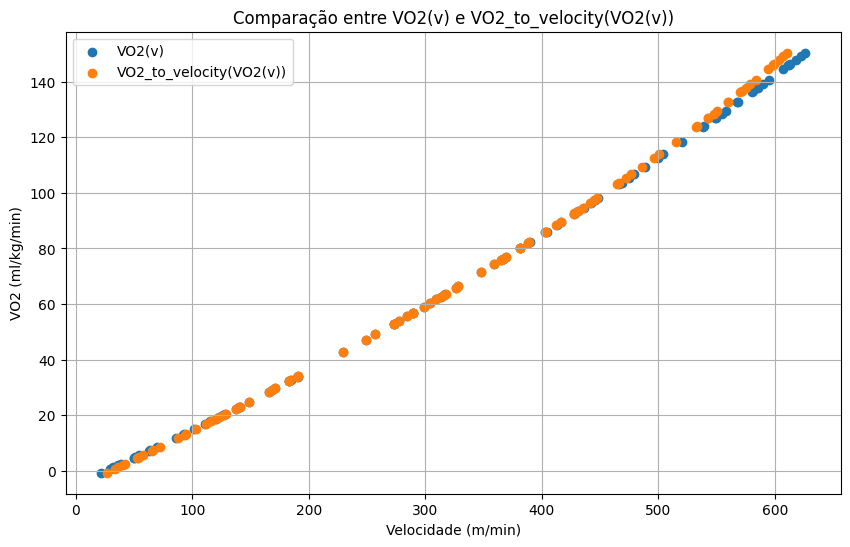

In [27]:
# @title
# comparar as funções "VO2" e "VO2_to_velocity"?
# Mostrando que são funções quase inversas

import matplotlib.pyplot as plt
import numpy as np
# Cria um range aleatório de velocidades
velocities = np.random.uniform(20, 630, 100)

# Calcula o VO2 para cada velocidade
vo2_values = [VO2(v) for v in velocities]

# Calcula a velocidade teórica para cada valor de VO2
predicted_velocities = [VO2_to_velocity(vo2) for vo2 in vo2_values]

# Plota os resultados
plt.figure(figsize=(10, 6))
plt.scatter(velocities, vo2_values, label='VO2(v)')
plt.scatter(predicted_velocities, vo2_values, label='VO2_to_velocity(VO2(v))')
plt.xlabel('Velocidade (m/min)')
plt.ylabel('VO2 (ml/kg/min)')
plt.title('Comparação entre VO2(v) e VO2_to_velocity(VO2(v))')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
# @title
seconds_to_min_seconds(90)

(1, 30)

In [29]:
# @title
seconds_to_str(65)

"1'05.00"

In [30]:
# @title
seconds_to_str(71)

"1'11.00"

In [31]:
# @title
race_predictions(5000, 25*60+34)

[(400, '00:01:40'),
 (800, '00:03:30'),
 (804.672, '00:03:32'),
 (1000, '00:04:29'),
 (1500, '00:07:00'),
 (1609.344, '00:07:34'),
 (3000, '00:14:53'),
 (3218.688, '00:16:03'),
 (4828.032, '00:24:38'),
 (5000, '00:25:34'),
 (10000, '00:53:04'),
 (15000, '01:21:46'),
 (16093.44, '01:28:09'),
 (20000, '01:51:10'),
 (21095, '01:57:40'),
 (30000, '02:50:42'),
 (42195, '04:03:08')]

In [32]:
# @title
VDot(5000, 1622) #

34.91187301392346

In [33]:
# @title
parse_time('27:02')

1622

In [34]:
# @title
def pace(race_distance, time):
    '''
    race_distance : km
    time : str 'hh:mm:ss'
    '''
    race_duration = parse_time(time)
    return  seconds_to_str(race_duration / race_distance)


print(pace(5, '00:27:00'))

5'24.00


In [35]:
# @title
pace(2.45,"00:12:00")

"4'53.88"

In [36]:
# @title
seconds_to_str(1620)

"27'00.00"

In [37]:
# @title
percent_VOmax(1620)

0.9357836975034151

In [38]:
# @title
effort(0.9357836975034151, 34.96)

"5'24.22"

In [39]:
# @title
# Função que dado a frequência cardiaca de repouso, frequecia cardiaca máxima, vo2max (VDot) e percentual de vo2max retorne a frequencia cárdiaca indicada e o respectivo pace

def target_heart_rate_and_pace(resting_hr, max_hr, vdot, vo2_percent):
  """
  Calcula a frequência cardíaca alvo e o pace correspondente.

  Args:
    resting_hr: Frequência cardíaca em repouso.
    max_hr: Frequência cardíaca máxima.
    vdot: Valor do VDot (VO2 máximo estimado).
    vo2_percent: Percentual do VO2 máximo desejado.

  Returns:
    Uma tupla contendo a frequência cardíaca alvo e o pace correspondente em segundos por quilômetro.
  """

  # Calcula a reserva de frequência cardíaca
  heart_rate_reserve = max_hr - resting_hr

  # Calcula a frequência cardíaca alvo
  target_heart_rate = int(resting_hr + vo2_percent * heart_rate_reserve)

  # Calcula a velocidade correspondente ao percentual de VO2 máximo
  target_velocity = VO2_to_velocity(vo2_percent * vdot)

  # Calcula o pace correspondente em segundos por quilômetro
  target_pace = velocity_to_pace(target_velocity)

  return target_heart_rate, seconds_to_str(target_pace)

In [40]:
# @title
lzon = [target_heart_rate_and_pace(52, 196, VDot(5000, 25*60+34), k) for k in [0.5,0.6, 0.7, 0.8, 0.9, 1.0]]

for i in range(5):
  print(f"Em Z{i+1} correr {lzon[i]} a {lzon[i+1]}")

Em Z1 correr (124, "8'19.21") a (138, "7'15.76")
Em Z2 correr (138, "7'15.76") a (152, "6'27.15")
Em Z3 correr (152, "6'27.15") a (167, "5'48.72")
Em Z4 correr (167, "5'48.72") a (181, "5'17.58")
Em Z5 correr (181, "5'17.58") a (196, "4'51.84")


In [41]:
# @title
# Seu limiar de lactato é geralmente estimado entre 83% e 88% do seu VDOT.

vdot = VDot(5000, parse_time('28:02'))  # Substitua pelos seus valores de distância e tempo de corrida

# Calcula a faixa de frequência cardíaca para o limiar de lactato
lower_threshold_hr, lower_threshold_pace = target_heart_rate_and_pace(52, 196, vdot, 0.83)
upper_threshold_hr, upper_threshold_pace = target_heart_rate_and_pace(52, 196, vdot, 0.88)

print(f"Seu limiar de lactato estimado está entre {lower_threshold_hr} bpm ({lower_threshold_pace}) e {upper_threshold_hr} bpm ({upper_threshold_pace}).")
print(f"Seu limiar de lactato estimado pelos batimentos indicados no garmin é de {target_heart_rate_and_pace(52, 196, vdot, 0.865)} bpm")
print(f"Seu limiar de lactato estimado pelo pace indicado no garmin é de {target_heart_rate_and_pace(52, 196, vdot, 0.845)} bpm")

Seu limiar de lactato estimado está entre 171 bpm (6'09.26) e 178 bpm (5'52.68).
Seu limiar de lactato estimado pelos batimentos indicados no garmin é de (176, "5'57.49") bpm
Seu limiar de lactato estimado pelo pace indicado no garmin é de (173, "6'04.11") bpm


In [42]:
# @title
# Tempo da corrida de 5 km em segundos
tempo_5km_segundos = parse_time(tstr)

# Estimativas de tempo para outras distâncias
estimativas = predict_from_test(5000, tstr)
print("Estimativas de tempo para outras distâncias:")
for distancia, tempo in estimativas:
    print(f"{distancia} metros: {tempo}")

# Sugestões de ritmo para treinamento
ritmos_treino = training_from_test(5000, tstr)
print("\nSugestões de ritmo para treinamento:")
for nivel, ritmos in ritmos_treino:
    print(f"{nivel}: {ritmos[0]} - {ritmos[1]}")

Estimativas de tempo para outras distâncias:
400 metros: 00:01:40
800 metros: 00:03:30
804.672 metros: 00:03:32
1000 metros: 00:04:29
1500 metros: 00:07:00
1609.344 metros: 00:07:34
3000 metros: 00:14:53
3218.688 metros: 00:16:03
4828.032 metros: 00:24:38
5000 metros: 00:25:34
10000 metros: 00:53:04
15000 metros: 01:21:46
16093.44 metros: 01:28:09
20000 metros: 01:51:10
21095 metros: 01:57:40
30000 metros: 02:50:42
42195 metros: 04:03:08

Sugestões de ritmo para treinamento:
easy: 7'21.34 - 6'10.74
marathon: 6'06.87 - 5'35.51
threshold: 5'38.71 - 5'23.32
interval: 5'04.13 - 4'51.84
maximal: 4'51.84 - 4'40.58


In [43]:
# @title
race_distance = 5000  # 5 km
race_duration = parse_time(tstr) #1650  # 27:30
vdot = VDot(race_distance, race_duration)

# Previsão de tempo para 10 km usando o método de Newton
predicted_time_10k = predict(vdot, 10000)
print(f"Tempo previsto para 10 km: {format_timedelta(pd.to_timedelta(predicted_time_10k,unit='s'))}")

Tempo previsto para 10 km: 00:53:04


In [44]:
# @title
race_distance = 1609.344
race_duration = parse_time("07:26")
vdot = VDot(race_distance, race_duration)

# Previsão de tempo para 5 km usando o método de Newton
predicted_time_5k = predict(vdot, 5000)
print(f"Tempo previsto para 5 km: {format_timedelta(pd.to_timedelta(predicted_time_5k,unit='s'))}")

predicted_time_10k = predict(vdot, 10000)
print(f"Tempo previsto para 10 km: {format_timedelta(pd.to_timedelta(predicted_time_10k,unit='s'))}")

Tempo previsto para 5 km: 00:25:07
Tempo previsto para 10 km: 00:52:09


In [45]:
df_pace

,Distance,Time,pace,Velocity,ppvo2mx,vo2,vo2max,Estimated Time (min),Estimated Time (hh:mm:ss)
0,0.400000,1.550000,3.875000,258.064516,1.207295,49.360441,40.885155,1.550000,00:01:33
1,0.804672,3.466667,4.308174,232.116923,1.134214,43.308506,38.183726,3.264687,00:03:15
2,1.000000,4.400000,4.400000,227.272727,1.106816,42.194174,38.122113,4.135626,00:04:08
3,1.609344,7.416667,4.608503,216.990202,1.043614,39.845014,38.179832,6.978051,00:06:58
4,3.218688,16.066667,4.991682,200.333278,0.967680,36.086219,37.291487,14.844152,00:14:50
5,5.000000,25.566667,5.113333,195.567145,0.938781,35.021314,37.305112,23.660894,00:23:39
6,10.000000,55.333333,5.533333,180.722892,0.893419,31.734912,35.520760,49.087269,00:49:05
7,21.097500,126.566667,5.999131,166.690809,0.837592,28.670459,34.229611,108.841810,01:48:50
8,42.195000,287.483333,6.813209,146.773726,0.804810,24.391109,30.306683,225.515372,03:45:30


In [46]:
df_pace.loc[7,'Time'], format_timedelta(timedelta(minutes = df_pace.loc[7,'Time']))

(126.56666666666666, '02:06:34')

In [47]:
t10k = format_timedelta(timedelta(minutes = df_pace.loc[6,'Time']))

In [48]:
# @title
# Exemplo de uso de predict_and_prescribe
treino, predicoes = predict_and_prescribe(5000, parse_time(tstr))  # Distância: 5km, Tempo: 27:02 minutos

print("Sugestões de ritmo para treinamento:")
for tipo, intervalo in treino:
    print(f"{tipo}: {intervalo[0]} - {intervalo[1]}")

print("\nPrevisões de tempo para outras distâncias:")
for distancia, tempo in predicoes:
    print(f"{distancia} metros: {tempo}")

# Exemplo de uso de training_from_test
ritmos_treino = training_from_test(10000, t10k)  # Distância: 10km, Tempo: 56:24 minutos

print("\nSugestões de ritmo para treinamento (baseado no teste de 10km): em ",t10k)
for nivel, ritmos in ritmos_treino:
    print(f"{nivel}: {ritmos[0]} - {ritmos[1]}")

# Exemplo de uso de predict_from_test
t21k = format_timedelta(timedelta(minutes = df_pace.loc[7,'Time']))
estimativas = predict_from_test(21097, t21k)  # Distância: Meia Maratona,

print("\nEstimativas de tempo para outras distâncias (baseado na Meia Maratona) em ",t21k)
for distancia, tempo in estimativas:
    print(f"{distancia} metros: {tempo}")

Sugestões de ritmo para treinamento:
easy: 7'21.34 - 6'10.74
marathon: 6'06.87 - 5'35.51
threshold: 5'38.71 - 5'23.32
interval: 5'04.13 - 4'51.84
maximal: 4'51.84 - 4'40.58

Previsões de tempo para outras distâncias:
400 metros: 00:01:40
800 metros: 00:03:30
804.672 metros: 00:03:32
1000 metros: 00:04:29
1500 metros: 00:07:00
1609.344 metros: 00:07:34
3000 metros: 00:14:53
3218.688 metros: 00:16:03
4828.032 metros: 00:24:38
5000 metros: 00:25:34
10000 metros: 00:53:04
15000 metros: 01:21:46
16093.44 metros: 01:28:09
20000 metros: 01:51:10
21095 metros: 01:57:40
30000 metros: 02:50:42
42195 metros: 04:03:08

Sugestões de ritmo para treinamento (baseado no teste de 10km): em  00:55:20
easy: 7'37.92 - 6'25.18
marathon: 6'21.18 - 5'48.78
threshold: 5'52.09 - 5'36.17
interval: 5'16.30 - 5'03.57
maximal: 5'03.57 - 4'51.90

Estimativas de tempo para outras distâncias (baseado na Meia Maratona) em  02:06:34
400 metros: 00:01:48
800 metros: 00:03:47
804.672 metros: 00:03:48
1000 metros: 00:04:5

In [49]:
# @title
# Exemplo de uso de predict_from_test
estimativas = predict_from_test(42195, "03:00:00")

print("\nEstimativas de tempo para outras distâncias (baseado em uma Maratona Sub3):")
for distancia, tempo in estimativas:
    print(f"{distancia} metros: {tempo}")


# Exemplo de uso de predict_from_test
estimativas = predict_from_test(42195, "02:55:00")

print("\nEstimativas de tempo para outras distâncias (baseado em uma Maratona a 2:55):")
for distancia, tempo in estimativas:
    print(f"{distancia} metros: {tempo}")


Estimativas de tempo para outras distâncias (baseado em uma Maratona Sub3):
400 metros: 00:01:14
800 metros: 00:02:33
804.672 metros: 00:02:34
1000 metros: 00:03:15
1500 metros: 00:05:04
1609.344 metros: 00:05:29
3000 metros: 00:10:52
3218.688 metros: 00:11:44
4828.032 metros: 00:18:07
5000 metros: 00:18:48
10000 metros: 00:38:59
15000 metros: 00:59:55
16093.44 metros: 01:04:35
20000 metros: 01:21:28
21095 metros: 01:26:15
30000 metros: 02:05:36
42195 metros: 03:00:00

Estimativas de tempo para outras distâncias (baseado em uma Maratona a 2:55):
400 metros: 00:01:11
800 metros: 00:02:29
804.672 metros: 00:02:30
1000 metros: 00:03:10
1500 metros: 00:04:55
1609.344 metros: 00:05:19
3000 metros: 00:10:33
3218.688 metros: 00:11:23
4828.032 metros: 00:17:36
5000 metros: 00:18:16
10000 metros: 00:37:53
15000 metros: 00:58:13
16093.44 metros: 01:02:45
20000 metros: 01:19:09
21095 metros: 01:23:48
30000 metros: 02:02:04
42195 metros: 02:55:00


In [50]:
# @title
# Exemplo de uso de predict_and_prescribe
treino, predicoes = predict_and_prescribe(21095, parse_time("01:23:48"))

print("Estimativas baseados em uma Maratona a 2:55")

print("Sugestões de ritmo para treinamento:")
for tipo, intervalo in treino:
    print(f"{tipo}: {intervalo[0]} - {intervalo[1]}")

print("\nPrevisões de tempo para outras distâncias:")
for distancia, tempo in predicoes:
    print(f"{distancia} metros: {tempo}")

Estimativas baseados em uma Maratona a 2:55
Sugestões de ritmo para treinamento:
easy: 5'24.70 - 4'30.65
marathon: 4'27.72 - 4'04.19
threshold: 4'06.58 - 3'55.12
interval: 3'40.91 - 3'31.87
maximal: 3'31.87 - 3'23.62

Previsões de tempo para outras distâncias:
400 metros: 00:01:11
800 metros: 00:02:29
804.672 metros: 00:02:30
1000 metros: 00:03:10
1500 metros: 00:04:55
1609.344 metros: 00:05:19
3000 metros: 00:10:33
3218.688 metros: 00:11:23
4828.032 metros: 00:17:36
5000 metros: 00:18:16
10000 metros: 00:37:53
15000 metros: 00:58:13
16093.44 metros: 01:02:45
20000 metros: 01:19:09
21095 metros: 01:23:48
30000 metros: 02:02:03
42195 metros: 02:54:58


In [51]:
estimativas = predict_from_test(42195, "04:00:00")

print("\nEstimativas de tempo para outras distâncias (baseado em uma Maratona Sub4):")
for distancia, tempo in estimativas:
    print(f"{distancia} metros: {tempo}")


Estimativas de tempo para outras distâncias (baseado em uma Maratona Sub4):
400 metros: 00:01:39
800 metros: 00:03:28
804.672 metros: 00:03:29
1000 metros: 00:04:25
1500 metros: 00:06:54
1609.344 metros: 00:07:27
3000 metros: 00:14:41
3218.688 metros: 00:15:50
4828.032 metros: 00:24:18
5000 metros: 00:25:13
10000 metros: 00:52:21
15000 metros: 01:20:40
16093.44 metros: 01:26:58
20000 metros: 01:49:40
21095 metros: 01:56:05
30000 metros: 02:48:26
42195 metros: 04:00:00


# Memórias

* Primeira Solução (ruim) com lopp


```
def calculate_x(Ti, Tj, Di, Dj):
    return (np.log(Ti) - np.log(Tj)) / (np.log(Di) - np.log(Dj))



def create_pivot_table(df):
    # Inicializar uma matriz para armazenar os valores calculados
    n = len(df)
    result = np.zeros((n, n))

    # Calcular os valores para cada par (i, j)
    for i in range(n):
        for j in range(n):
            if i != j:
                result[i, j] = calculate_x(df.iloc[i,1], df.iloc[j,1], df.iloc[i,0], df.iloc[j,0])
            else:
                result[i, j] = np.nan  # Ou outro valor que faça sentido para você

    # Converter a matriz resultante em um DataFrame para melhor visualização
    pivot_df = pd.DataFrame(result, index=df.index, columns=df.index)

    return pivot_df


# Criar a tabela dinâmica
pivot_df = create_pivot_table(df_pace)
```

AlanLyttonJones/Age-Grade-Tables: Tables for grading road-running performances based on gender and age
https://github.com/AlanLyttonJones/Age-Grade-Tables

Your Stars
https://github.com/rafaeldjsm?direction=desc&sort=created&tab=stars

Is that possible to run job which takes more than 6 hours on self-hosted runner? · community · Discussion #26679
https://github.com/orgs/community/discussions/26679

VO2max calculator
https://gist.github.com/odinokov/ab246e72d883ade1a15ba1185e4fc422

mattncott/running-calculations: A set of calculations that can be used to analyse a runner's training data.
https://github.com/mattncott/running-calculations

Constantinepapp/fitnessbot2
https://github.com/Constantinepapp/fitnessbot2

running-calculations/src/Running/Vdot.php at master · lsolesen/running-calculations
https://github.com/lsolesen/running-calculations/blob/master/src/Running/Vdot.php

Accurate VO2 Max for Zwift and Strava : 8 Steps (with Pictures) - Instructables
https://www.instructables.com/Accurate-VO2-Max-for-Zwift-and-Strava/

konaendu/MetabolicRunAnalyzer
https://github.com/konaendu/MetabolicRunAnalyzer

karalyndewalt/FastAsYouCan: Training program generator using Jack Daniels' Running Formula
https://github.com/karalyndewalt/FastAsYouCan

Running Index issue for near maximale performance... · Issue #871 · thomaschampagne/elevate
https://github.com/thomaschampagne/elevate/issues/871

sbailliez/training-plan: Displays training plan for 5K, 10K, Half-Marathon and Marathon using the FIRST training plan.
https://github.com/sbailliez/training-plan

sean-obrien’s gists
https://gist.github.com/sean-obrien

RUNALYZE - Data analysis for athletes
https://runalyze.com/

mekeetsa/vdot: VO2 expenditure equations based on the Daniels-Gilbert formula
https://github.com/mekeetsa/vdot

MRK132/Garmin_VO2_Max_Modelling: VO2 Max can be an indicator of overall aerobic fitness level. Using the Garmin Connect Python API, gather relevant metrics, fit to regression model and inspect feature importance metrics using SHAP values. Here I track my Running VO2 Max over the past year, and investigate if there are any particular features that impact the VO2 Max score.
https://github.com/MRK132/Garmin_VO2_Max_Modelling

VO2 Max and Training Effect not updating · Issue #578 · philosowaffle/peloton-to-garmin
https://github.com/philosowaffle/peloton-to-garmin/issues/578

RyanPark44/vo2-max-calculator
https://github.com/RyanPark44/vo2-max-calculator

runningCalculator/running_calculator/core/calculator.py at master · ronek22/runningCalculator
https://github.com/ronek22/runningCalculator/blob/master/running_calculator/core/calculator.py

runningCalculator - Replit
https://replit.com/@ronek22/runningCalculator#main.py

runningCalculator - Replit
https://replit.com/@ronek22/runningCalculator#vdot.py